In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 학습데이터 불러오기
train = pd.read_csv("bike-sharing-demand/train.csv") 
#print(train.info())
#test = pd.read_csv("bike-sharing-demand/test.csv")
#print(test.info())

# test.csv 정답이 없어서 안해도 될 것 같음.


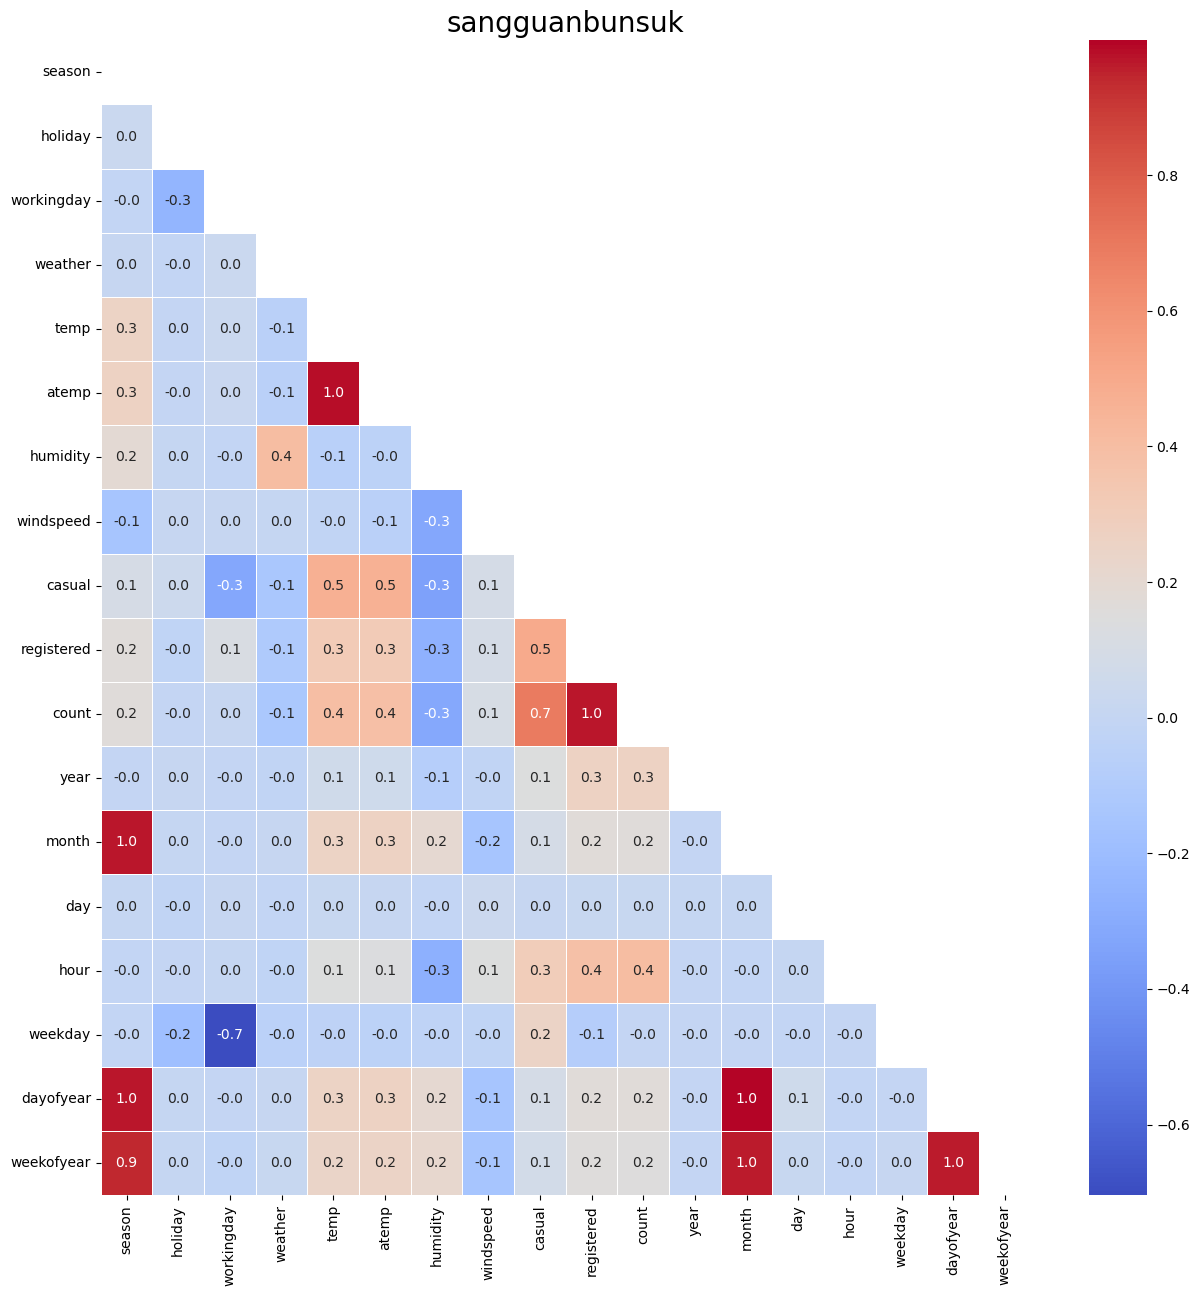

In [198]:
# 히트맵 만들어서 분석하기
train_df = pd.read_csv("bike-sharing-demand/train.csv") 

train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['year'] = train_df['datetime'].dt.year 
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekday'] = train_df['datetime'].dt.dayofweek
train_df['dayofyear'] = train_df['datetime'].dt.dayofyear
train_df['weekofyear'] = train_df['datetime'].dt.isocalendar().week.astype(int)

train_df_for_corr = train_df.drop('datetime', axis=1)

correlation_matrix = train_df_for_corr.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('sangguanbunsuk', size=20)   
plt.show()

In [199]:
'''
registered (0.7) & casual (0.7): count와 가장 강한 양의 상관관계
count = registered + casual

hour (0.4): 시간(hour)은 대여량(count)과 강한 양의 상관관계
temp (0.4): 온도(temp) 역시 대여량과 강한 양의 상관관계
humidity (-0.3): 습도(humidity)는 약한 음의 상관관계
year (0.3): year도 뚜렷한 양의 상관관계
weather (-0.1): 날씨(weather)는 약한 음의 상관관계

다중 공선성?도 고려할까
temp / atemp

atemp 제거

season /  month 
dayofyear / month

이거 두개는 pca?
'''
'''
데이터를 잘 살펴보면 19일 이후로 다음달로 넘어간다.
우리가 예측하는 것이 월말인지 아니면, 일반화인지

계절별이나 월별로 나누어서 따로 모델을 학습시키는 것은 어떤지?

선형모델이면 나누는게 나을거 같고, 앙상블이면 안나눠도 될거 같고

일단 시도해볼 만한 가치는 있지만, 단일 모델보다 항상 좋다는 보장은 없다.
'''

pass

In [200]:
# 우리가 예측하려는 count는  casual + registered 이기 때문에 이 3가지 컬럼을 제거해야한다.
# 결측치 확인
train.isnull().sum()
#test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

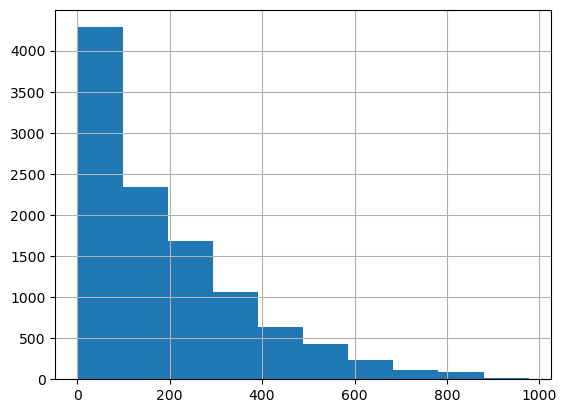

In [193]:
train['count'].hist()

In [201]:
train = train.drop(['casual', 'registered'], axis=1) #3가지 컬럼을 제거.
target = train.pop('count')
train.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0


In [202]:
#test.head(3)  # train과 test가 데이터 컬럼이 같음을 확인하였다.
pass

In [ ]:
# train, test 데이터를 전처리
# minute,second는 중요할까? 다 0이던데.. << 없앰
# datetime을 전처리해서 뭔가 더 중요한 걸 찾을 수 있을 것 같음 
# 계절, 공휴일, 공휴일 아님
# 요일도 괜찮을 거 같음. 월화수목금 12345
# 1년 중 몇번째 날인지? 120/365
# 1년 중 몇 번재 주인지?
# 연속형 변수 temp humidity windspeed에 대한 표준화



both_df = [train] #,test

for df in both_df:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.dayofweek
    df['dayofyear'] = df['datetime'].dt.dayofyear
    df['weekofyear'] = df['datetime'].dt.isocalendar().week.astype(int)

# test.info()

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   year        10886 non-null  int32         
 10  month       10886 non-null  int32         
 11  day         10886 non-null  int32         
 12  hour        10886 non-null  int32         
 13  weekday     10886 non-null  int32         
 14  dayofyear   10886 non-null  int32         
 15  weekofyear  10886 non-null  int32         
dtypes: datetime64[ns](1), 

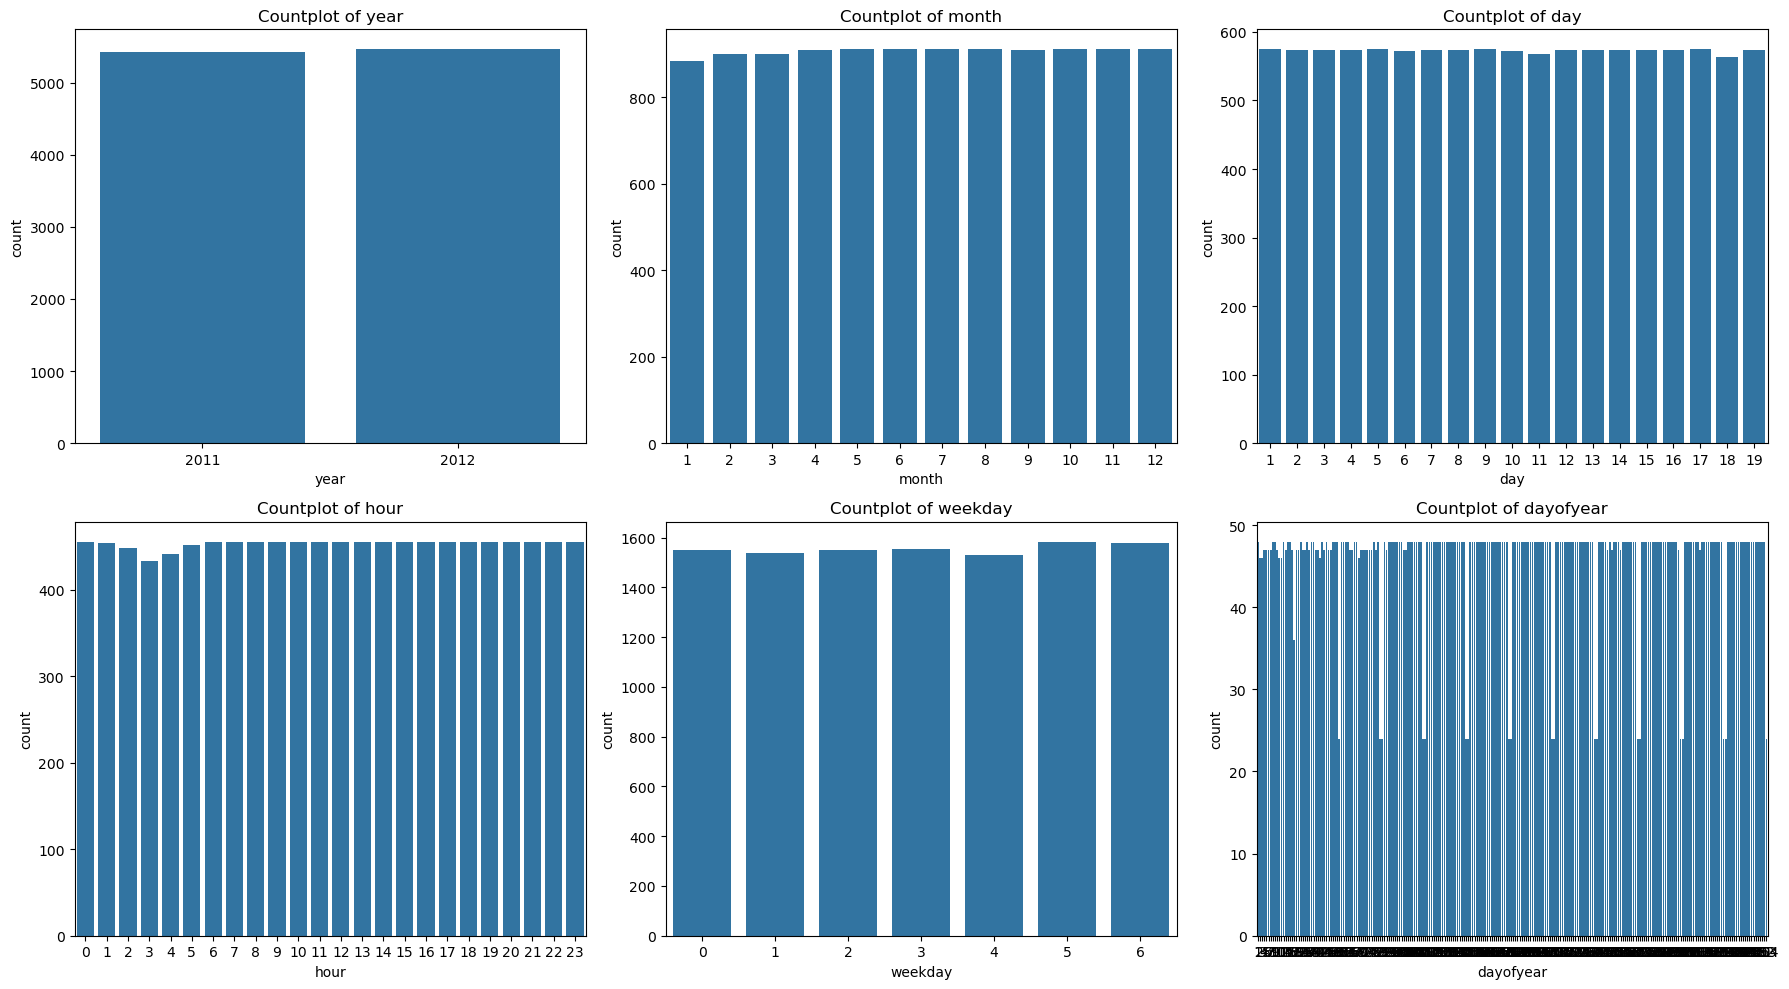

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'weekday', 'dayofyear']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [205]:
# 모델은 date time을 이해하지 못하므로 drop
train = train.drop('datetime', axis=1)
# test = test.drop('datetime', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler # 연속형 변수 temp humidity windspeed에 대한 표준화
from sklearn.model_selection import train_test_split
features = ['hour','temp','year','humidity','windspeed','weather','weekday','month']
#features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed','weather']
#features = ['holiday','weather','temp','humidity','windspeed','year','month','hour','weekday']
X = train[features]
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=412) 

numeric_features = ['temp', 'humidity', 'windspeed']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int32  
 9   month       10886 non-null  int32  
 10  day         10886 non-null  int32  
 11  hour        10886 non-null  int32  
 12  weekday     10886 non-null  int32  
 13  dayofyear   10886 non-null  int32  
 14  weekofyear  10886 non-null  int32  
dtypes: float64(3), int32(7), int64(5)
memory usage: 978.2 KB


In [257]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_features])

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[numeric_features] = scaler.transform(X_train[numeric_features])
X_val_scaled[numeric_features] = scaler.transform(X_val[numeric_features])

X_train_scaled[numeric_features].head(2)
#X_train['windspeed'].head(2)

,temp,humidity,windspeed
7001,-0.397440,-0.612003,0.270037
8375,1.182018,0.632826,-0.464015


In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_val)


In [259]:
# 표준화
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
predictions_scaled = model_scaled.predict(X_val_scaled)
model_scaled.predict(X_val_scaled)


array([ 64.76320308, 222.72209728, 240.63485316, ..., -26.73728175,
        12.60227793, 234.57839677])

In [260]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_train)
mse = mean_squared_error(y_val, prediction)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2", r2_score(y_val, prediction))

y_pred_scaled  = model_scaled.predict(X_val_scaled)
mse_scaled = mean_squared_error(y_val, predictions_scaled) 
rmse_scaled =  np.sqrt(mse_scaled)
print("MSE:", mse_scaled)
print("RMSE:", rmse_scaled)
print("R2_scaled", r2_score(y_val, predictions_scaled))


MSE: 19283.10289871316
RMSE: 138.86361257980136
R2 0.4047983182989672
MSE: 19283.102898713336
RMSE: 138.86361257980198
R2_scaled 0.40479831829896185


In [ ]:
'''
표준화 전 성능과 표준화 후 성능이 놀라울 정도로 같은 것으로 보아
단순선형회귀는 표준화가 결과에 미치는 영향이 미미하다.
'''

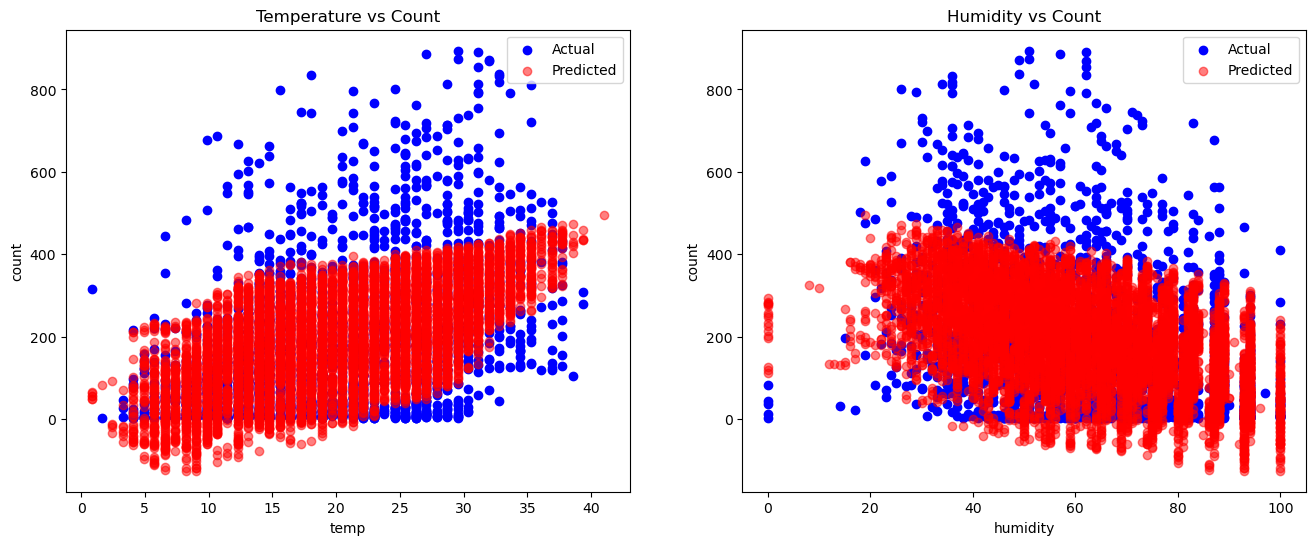

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_val['temp'], y_val, color='blue', label='Actual')
axs[0].scatter(X_train['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_val['humidity'], y_val, color='blue', label='Actual')
axs[1].scatter(X_train['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()
